In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_dataset(filepath):
    return pd.read_csv(filepath)

df = load_dataset('D:/COLLEGE/Third semester/Data Science/Assignment Health DataSet/Health_heart_experimental.csv')
df.head(5)

,Unnamed: 0,age,sex,SysBP,DiaBP,HR,weightKg,heightCm,BMI,indication
0,0,64,1,141,96,128,69,147,32.0,1
1,1,21,1,109,100,106,48,150,21.0,0
2,2,30,0,112,73,126,69,183,21.0,0
3,3,35,1,106,90,130,45,149,20.0,0
4,4,39,0,140,90,112,92,166,33.0,1


# **LINE CHART**

In [3]:
df['HR'].describe()

count    71760.000000
mean       138.539298
std         35.239098
min         78.000000
25%        108.000000
50%        139.000000
75%        169.000000
max        199.000000
Name: HR, dtype: float64

 ``` We know that the max heart rate is calculated by subtracting your age from 220. For example: for a person with age 20(lowest in the age group), the max. heart rate will be 200(220-20). ```

In [4]:
df['age'].describe()

count    71760.000000
mean        44.453526
std         14.514111
min         20.000000
25%         32.000000
50%         44.000000
75%         57.000000
max         69.000000
Name: age, dtype: float64

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11332\1995035860.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_HR = df.groupby('ageGroup')['HR'].mean()


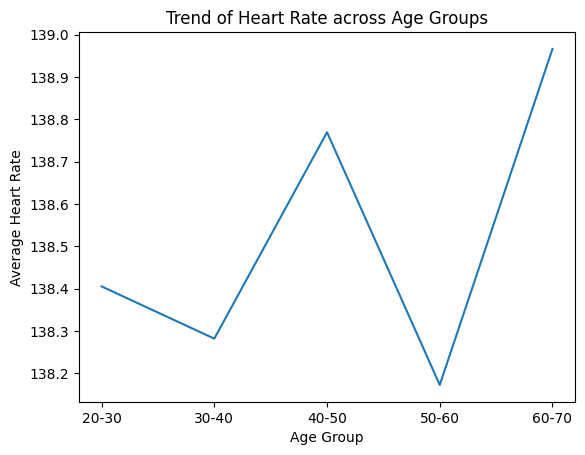

In [5]:
df['ageGroup'] = pd.cut( 
    df['age'],
    bins = [20, 30, 40, 50, 60, 70],
    labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
)

avg_HR = df.groupby('ageGroup')['HR'].mean()

plt.figure()
plt.plot(avg_HR.index, avg_HR.values)
plt.xlabel("Age Group")
plt.ylabel('Average Heart Rate')
plt.title('Trend of Heart Rate across Age Groups')
plt.show()

# **BAR PLOT**

In [6]:
df['sex'].describe()

count    71760.000000
mean         0.499080
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: sex, dtype: float64

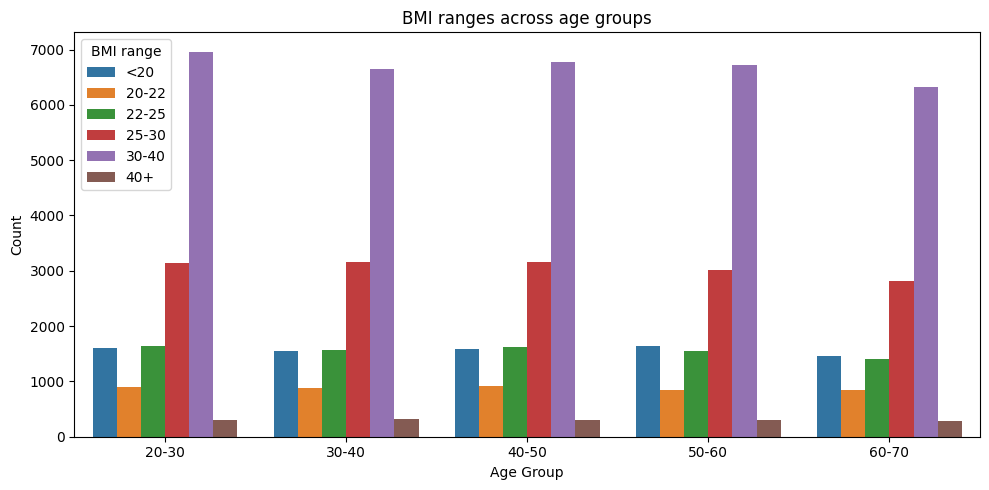

BMI
32.0    3603
34.0    3573
35.0    3563
36.0    3514
33.0    3510
37.0    3424
38.0    3417
30.0    3415
29.0    3321
27.0    3237
31.0    3208
28.0    3179
26.0    3035
39.0    2886
25.0    2867
24.0    2807
23.0    2694
22.0    2443
21.0    2375
20.0    2150
19.0    2079
18.0    1855
17.0    1532
40.0    1529
16.0    1212
15.0     856
14.0     432
13.0      44
Name: count, dtype: int64

In [8]:
df['ageGroup'] = pd.cut( 
    df['age'],
    bins = [20, 30, 40, 50, 60, 70],
    labels = ['20-30', '30-40', '40-50', '50-60', '60-70']
) 


bmi_bins = [0.0, 20.0, 22.0, 25.0, 30.0, 40.0, float('inf')]
bmi_labels = ['<20', '20-22', '22-25', '25-30', '30-40', '40+']
df['BMI_range'] = pd.cut(df['BMI'], bins=bmi_bins, labels=bmi_labels, right=False)

plt.figure(figsize=(10, 5))
sns.countplot(
    data=df,
    x='ageGroup',
    hue='BMI_range',
    order=['20-30','30-40','40-50','50-60','60-70']
)
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("BMI ranges across age groups")
plt.legend(title="BMI range")
plt.tight_layout()
plt.show()
df['BMI'].value_counts()

**Pie chart, box plot, histogram, scatter plot**